In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier

In [2]:
all_dat=pd.read_csv("POSData.csv",names=['check_number','profit_center_id','profit_center_name','tendered_date_time','tendered_date',
                       'menu_item_id','menu_item_name','menu_item_quantity',
                       'additional_tender_data','tender_name','discount_name'],encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3_new\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_dat.tail()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,additional_tender_data,tender_name,discount_name
6017254,7685982,21,Snack 21 L4 B43 Members Snack,2018-09-29 15:53:07.000,2018-09-29,30004,Hot Chips (OS),1,NaN,IntegratedEftpos,NaN
6017255,5823166,63,Snack 63 L4 B12 Southern,2018-09-29 15:53:09.000,2018-09-29,30004,Hot Chips (OS),3,NaN,Cash,NaN
6017256,7685983,21,Snack 21 L4 B43 Members Snack,2018-09-29 15:53:15.000,2018-09-29,30004,Hot Chips (OS),1,NaN,Cash,NaN
6017257,7337095,26,Snack 26 L4 B55 Northern,2018-09-29 15:53:18.000,2018-09-29,30004,Hot Chips (OS),1,NaN,IntegratedEftpos,NaN
6017258,5311495,54,Snack 54 L1 B6 Southern,2018-09-29 15:53:18.000,2018-09-29,30004,Hot Chips (OS),1,NaN,IntegratedEftpos,NaN


In [4]:
# train=pd.read_excel("Catering Outlet Mapping Sheet.xlsx")
# all_data=pd.read_csv("POSData.csv",nrows=1440000,header = None,parse_dates=[4])
# #df = pd.read_excel('POSData.xls',header = None, error_bad_lines=False)
# #df




In [5]:
# #df.rename(columns={ 'check_number', 'profit_center_id','profit_center_name','tendered_date_time','tendered_date',
#                        'menu_item_id','menu_item_name','menu_item_quantity',
#                        'additional_tender_data','tender_name','discount_name'})

In [6]:
# all_data = all_data.rename(columns={0: 'check_number',1:'profit_center_id',2:'profit_center_name',3:'tendered_date_time',4:'tendered_date',
#                        5:'menu_item_id',6:'menu_item_name',7:'menu_item_quantity',8:
#                        'additional_tender_data',9:'tender_name',10:'discount_name'})


In [7]:
all_dat.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,additional_tender_data,tender_name,discount_name
0,8112451,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:51:22.000,2018-03-01,60542,Staff Medium Coffee,1,NaN,Cash,NaN
1,8112452,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:52:10.000,2018-03-01,60529,Medium Coffee,1,NaN,Cash,NaN
2,8112453,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:57:56.000,2018-03-01,60529,Medium Coffee,1,NaN,IntegratedEftpos,NaN
3,8112454,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:59:34.000,2018-03-01,60529,Medium Coffee,1,NaN,IntegratedEftpos,NaN
4,8112467,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 08:22:23.000,2018-03-01,60199,Takeaway Button,1,NaN,IntegratedEftpos,NaN


In [8]:
all_dat.isnull().sum()

check_number                    1
profit_center_id                0
profit_center_name              0
tendered_date_time              0
tendered_date                   1
menu_item_id                    2
menu_item_name                  3
menu_item_quantity              7
additional_tender_data    5966654
tender_name                    11
discount_name             5924708
dtype: int64

In [9]:
all_dat.shape

(6017259, 11)

In [10]:
all_data_na = (all_dat.isnull().sum()/ len(all_dat)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

,Missing Raio
additional_tender_data,99.159002
discount_name,98.461908
tender_name,0.000183
menu_item_quantity,0.000116
menu_item_name,0.000050
menu_item_id,0.000033
tendered_date,0.000017
check_number,0.000017


In [11]:
all_dat.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,additional_tender_data,tender_name,discount_name
0,8112451,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:51:22.000,2018-03-01,60542,Staff Medium Coffee,1,NaN,Cash,NaN
1,8112452,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:52:10.000,2018-03-01,60529,Medium Coffee,1,NaN,Cash,NaN
2,8112453,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:57:56.000,2018-03-01,60529,Medium Coffee,1,NaN,IntegratedEftpos,NaN
3,8112454,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:59:34.000,2018-03-01,60529,Medium Coffee,1,NaN,IntegratedEftpos,NaN
4,8112467,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 08:22:23.000,2018-03-01,60199,Takeaway Button,1,NaN,IntegratedEftpos,NaN


In [12]:
dt=all_dat.drop(['additional_tender_data','discount_name'],axis=1)


In [13]:
dt.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
0,8112451,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:51:22.000,2018-03-01,60542,Staff Medium Coffee,1,Cash
1,8112452,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:52:10.000,2018-03-01,60529,Medium Coffee,1,Cash
2,8112453,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:57:56.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
3,8112454,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:59:34.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
4,8112467,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 08:22:23.000,2018-03-01,60199,Takeaway Button,1,IntegratedEftpos


In [14]:
ern=pd.read_excel("EventRefData.xlsx",names=['EVENTID','EVENTNAME','DESCR','EVENTDATE','EVENTTIME',
                       'DAYID','YEARID','WEATHERTEMP',
                       'WEATHERRAIN','WEATHERWIND','VENUEID','ATTENDANCEID','DAYNIGHTID','MatchTimeName','HomeTeamID','AwayTeamID','TOTALATT','EVENTCATEGORYID'
                                            'ISEVENTACTIVE','EVENTTYPECLASSID','PARENTEVENTID','EVENTSTATT','FINBUDGATT','EVENTNAMEDATE','DATE','EVENTMONTH','EVENTDAY','EVENTYEARNAME','FINANCIALYEAR','SEVENTAFINAL'],encoding = "ISO-8859-1")

In [15]:
ern.head()

,EVENTID,EVENTNAME,DESCR,EVENTDATE,EVENTTIME,DAYID,YEARID,WEATHERTEMP,WEATHERRAIN,WEATHERWIND,...,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,DATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,1478,Richmond vs. Carlton,Carpark closed to public. Staff Disability & e...,00:00:00,00:25:00.200000,7,24,23.6,0,9,...,1,90000,90000,Richmond vs. Carlton,2018-03-22,March,22,2018,2018,0
1,1479,Hawthorn vs. Collingwood,Carpark capacity reduced by 10% at 3pm Carpark...,00:00:00,00:25:00.800000,2,24,20.2,13,11,...,1,64000,64000,Hawthorn vs. Collingwood,2018-03-24,March,24,2018,2018,0
2,1480,Melbourne vs. Geelong Cats,Carpark Gate 3 Closed 14:40 Carpark Gate 5 Clo...,00:00:00,00:20:00.400000,3,24,23.9,0,15,...,1,51000,51000,Melbourne vs. Geelong Cats,2018-03-25,March,25,2018,2018,0
3,1481,Collingwood vs. GWS Giants,Carpark Gate 3 Closed 17:20 Carpark Gate 5 Clo...,00:00:00,00:35:00.800000,2,24,20.3,0,11,...,1,27000,27000,Collingwood vs. GWS Giants,2018-03-31,March,31,2018,2019,0
4,1482,Geelong Cats vs. Hawthorn,Carpark Gate 3 Closed 14:35 Carpark Gate 5 Clo...,00:00:00,00:20:00.700000,4,24,19.4,0,9,...,1,60000,60000,Geelong Cats vs. Hawthorn,2018-04-02,April,2,2018,2019,0


In [16]:
#ern=ern.drop(['EVENTMONTH','EVENTDAY','EVENTYEARNAME'],axis=1)

In [17]:
ern.shape

(52, 29)

In [18]:
dt.shape

(6017259, 9)

In [19]:
dt.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
0,8112451,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:51:22.000,2018-03-01,60542,Staff Medium Coffee,1,Cash
1,8112452,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:52:10.000,2018-03-01,60529,Medium Coffee,1,Cash
2,8112453,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:57:56.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
3,8112454,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:59:34.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
4,8112467,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 08:22:23.000,2018-03-01,60199,Takeaway Button,1,IntegratedEftpos


In [20]:
dt.isnull().sum()

check_number           1
profit_center_id       0
profit_center_name     0
tendered_date_time     0
tendered_date          1
menu_item_id           2
menu_item_name         3
menu_item_quantity     7
tender_name           11
dtype: int64

In [21]:
dt.dtypes

check_number          object
profit_center_id      object
profit_center_name    object
tendered_date_time    object
tendered_date         object
menu_item_id          object
menu_item_name        object
menu_item_quantity    object
tender_name           object
dtype: object

In [22]:
dt.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
0,8112451,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:51:22.000,2018-03-01,60542,Staff Medium Coffee,1,Cash
1,8112452,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:52:10.000,2018-03-01,60529,Medium Coffee,1,Cash
2,8112453,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:57:56.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
3,8112454,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 07:59:34.000,2018-03-01,60529,Medium Coffee,1,IntegratedEftpos
4,8112467,145,FD 525 L1 B37 Trumbles Dining,2018-03-01 08:22:23.000,2018-03-01,60199,Takeaway Button,1,IntegratedEftpos


In [23]:
dt['tendered_date']=dt['tendered_date'].astype(str)

In [24]:
dt[dt['tendered_date'].str.contains("38742")]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446517,7278515l06,Snack 16 L2Áf51 Nor¹°ern óu,201Þh04-25 7¦:36:49400,2018-04-25,38742,Bavline Twirl,2,NaN,NaN


In [25]:
dt.iloc[1446517:1446518,4:5]

,tendered_date
1446517,38742


In [26]:
dt.iloc[1446517:1446518,4:5]='2018-04-25'


In [27]:
dt.iloc[1446517:1446518,4:5]

,tendered_date
1446517,2018-04-25


In [28]:
# dt[dt['tendered_date'].str.contains("#<18-04-\x95")]
# dt.iloc[1446517:1446518,4:5]="2018-04-05"

In [29]:
dt[dt['tendered_date'].str.contains("2018-04-25¬7516")]
dt.iloc[1446577:1446578,4:5]="2018-04-25"

In [30]:
dt[dt['tendered_date'].str.contains("2018-04-25 16:36:51.00")]
dt.iloc[1446578:1446579,4:5]="2018-04-25"

In [31]:
dt[dt['tendered_date'].str.contains("201x-04-25")]
dt.iloc[1446590:1446591,4:5]="2018-04-25"

In [32]:
dt[dt['tendered_date'].str.contains("15813")]
dt.iloc[1446997:1446998]="2018-04-25"


In [33]:
dt.iloc[1446997:1446998,:]

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446997,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25


In [34]:
dt.iloc[1446997:1446998]

,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446997,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25


In [35]:
#dropping this row
dt[dt['tendered_date'].str.contains("Cup Draught 1 Cup 425ml \(OS\)")]
dt.iloc[1446997:1446998]
#dt.drop(dt.iloc[1446997:1446998,:], inplace=True)


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446997,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25,2018-04-25


In [36]:
dt=dt.drop(dt.index[1446997])


In [37]:
dt.iloc[1446577:1446578,4:5]

,tendered_date
1446577,2018-04-25


In [38]:
dt[dt['tendered_date'].str.contains('Smith\x7f\x84Original')]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446994,5022637,300,Bar 100 B1 B9 Southern,2019-04-25 16:34:46.004203x-04-25CÁ8,Cris$ SmithOriginal,1,lIntegratedEftpos,NaN,NaN


In [39]:
dt=dt.drop(dt.index[1446994])


In [40]:
dt[dt['tendered_date'].str.contains('#<18-04')]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446526,5013107,105,Bar 105 L1 B19 Southezn AFL,2018-04-05 16:36B06.000,#<18-04-,NaN,NaN,NaN,NaN


In [41]:
dt=dt.drop(dt.index[1446526])


In [42]:
dt[dt['tendered_date'].str.contains('425ml')]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446593,654¢87,82,¤yar 82 ,22812,Cup Draught 1 Cup 425ml (OS),1,NaN,IntegratedEftpos,NaN


In [43]:
dt=dt.drop(dt.index[1446593])


In [44]:
dt[dt['tendered_date'].str.contains('2018-34-25')]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name
1446523,5451055,57,Bar 57 L1 B14 Southern,2018-04-25 16:36:56.000,2018-34-25,30004,Hot Chips (OS),1,Cash


In [45]:
dt=dt.drop(dt.index[1446523])


In [46]:
dt[dt['tendered_date'].str.contains('2018-34-25')]


,check_number,profit_center_id,profit_center_name,tendered_date_time,tendered_date,menu_item_id,menu_item_name,menu_item_quantity,tender_name


In [47]:
dt.isnull().sum()

check_number          1
profit_center_id      0
profit_center_name    0
tendered_date_time    0
tendered_date         0
menu_item_id          1
menu_item_name        2
menu_item_quantity    4
tender_name           8
dtype: int64

In [48]:
dt=dt.dropna()

In [49]:
dt.isnull().sum()

check_number          0
profit_center_id      0
profit_center_name    0
tendered_date_time    0
tendered_date         0
menu_item_id          0
menu_item_name        0
menu_item_quantity    0
tender_name           0
dtype: int64

In [50]:
# dt=dt.drop([dt["tendered_date"] == "Cup Draught 1 Cup 425ml \(OS\)"],axis=0)
# #ern=ern.drop(['EVENTMONTH','EVENTDAY','EVENTYEARNAME'],axis=1)

In [51]:
dt['tendered_date'] =  pd.to_datetime(dt['tendered_date'])


In [52]:
dt=dt.rename(columns={'tendered_date': 'DATE'})

In [53]:
dt.dtypes

check_number                  object
profit_center_id              object
profit_center_name            object
tendered_date_time            object
DATE                  datetime64[ns]
menu_item_id                  object
menu_item_name                object
menu_item_quantity            object
tender_name                   object
dtype: object

In [54]:
ern.dtypes

EVENTID                                  int64
EVENTNAME                               object
DESCR                                   object
EVENTDATE                               object
EVENTTIME                               object
DAYID                                    int64
YEARID                                   int64
WEATHERTEMP                            float64
WEATHERRAIN                              int64
WEATHERWIND                              int64
VENUEID                                  int64
ATTENDANCEID                             int64
DAYNIGHTID                               int64
MatchTimeName                           object
HomeTeamID                               int64
AwayTeamID                               int64
TOTALATT                                 int64
EVENTCATEGORYIDISEVENTACTIVE             int64
EVENTTYPECLASSID                        object
PARENTEVENTID                            int64
EVENTSTATT                               int64
FINBUDGATT   

In [55]:
df_final=pd.merge(dt, ern, on='DATE', how='inner')

In [56]:
df_final.columns

Index(['check_number', 'profit_center_id', 'profit_center_name',
       'tendered_date_time', 'DATE', 'menu_item_id', 'menu_item_name',
       'menu_item_quantity', 'tender_name', 'EVENTID', 'EVENTNAME', 'DESCR',
       'EVENTDATE', 'EVENTTIME', 'DAYID', 'YEARID', 'WEATHERTEMP',
       'WEATHERRAIN', 'WEATHERWIND', 'VENUEID', 'ATTENDANCEID', 'DAYNIGHTID',
       'MatchTimeName', 'HomeTeamID', 'AwayTeamID', 'TOTALATT',
       'EVENTCATEGORYIDISEVENTACTIVE', 'EVENTTYPECLASSID', 'PARENTEVENTID',
       'EVENTSTATT', 'FINBUDGATT', 'EVENTNAMEDATE', 'EVENTMONTH', 'EVENTDAY',
       'EVENTYEARNAME', 'FINANCIALYEAR', 'SEVENTAFINAL'],
      dtype='object')

In [57]:
df_final.shape

(5851764, 37)

In [58]:
df_final.describe()

,EVENTID,DAYID,YEARID,WEATHERTEMP,WEATHERRAIN,WEATHERWIND,VENUEID,ATTENDANCEID,DAYNIGHTID,HomeTeamID,AwayTeamID,TOTALATT,EVENTCATEGORYIDISEVENTACTIVE,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
count,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5851764.0,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5.851764e+06,5851764.0,5.851764e+06,5.851764e+06
mean,1.505368e+03,2.777174e+00,2.392160e+01,1.525391e+01,1.153278e+00,1.496010e+01,1.0,1.021368e+03,1.467379e+00,8.735447e+00,9.508636e+00,6.774063e+04,1.112212e+00,3.992298e+00,6.860340e+04,6.860340e+04,1.538687e+01,2018.0,2.018929e+03,2.022298e-01
std,1.619519e+01,1.703077e+00,4.785906e-01,4.321988e+00,3.113803e+00,2.873491e+01,0.0,1.619519e+01,5.768736e-01,3.810962e+00,8.332241e+00,2.112682e+04,4.307289e-01,1.012032e+01,2.120906e+04,2.120906e+04,8.830963e+00,0.0,2.568368e-01,4.016627e-01
min,1.478000e+03,1.000000e+00,2.100000e+01,6.500000e+00,0.000000e+00,0.000000e+00,1.0,9.940000e+02,1.000000e+00,3.000000e+00,1.000000e+00,2.307200e+04,1.000000e+00,1.000000e+00,2.600000e+04,2.600000e+04,1.000000e+00,2018.0,2.018000e+03,0.000000e+00
25%,1.490000e+03,2.000000e+00,2.400000e+01,1.240000e+01,0.000000e+00,7.000000e+00,1.0,1.006000e+03,1.000000e+00,5.000000e+00,4.000000e+00,5.039300e+04,1.000000e+00,1.000000e+00,5.000000e+04,5.000000e+04,7.000000e+00,2018.0,2.019000e+03,0.000000e+00
50%,1.506000e+03,2.000000e+00,2.400000e+01,1.380000e+01,0.000000e+00,1.100000e+01,1.0,1.022000e+03,1.000000e+00,1.000000e+01,7.000000e+00,7.070100e+04,1.000000e+00,1.000000e+00,7.300000e+04,7.300000e+04,1.500000e+01,2018.0,2.019000e+03,0.000000e+00
75%,1.520000e+03,3.000000e+00,2.400000e+01,1.840000e+01,1.000000e+00,1.500000e+01,1.0,1.036000e+03,2.000000e+00,1.200000e+01,1.200000e+01,8.818000e+04,1.000000e+00,1.000000e+00,8.700000e+04,8.700000e+04,2.400000e+01,2018.0,2.019000e+03,0.000000e+00
max,1.529000e+03,7.000000e+00,2.400000e+01,2.850000e+01,1.700000e+01,2.010000e+02,1.0,1.045000e+03,3.000000e+00,1.800000e+01,4.100000e+01,1.000220e+05,3.000000e+00,4.500000e+01,1.000240e+05,1.000240e+05,3.100000e+01,2018.0,2.019000e+03,1.000000e+00


In [59]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


## Menu item number top 10

In [60]:
df_final=df_final.drop(dt.index[1416203])


In [61]:
df_final['menu_item_id']=pd.to_numeric(df_final['menu_item_id'])


In [62]:
df_final.dtypes

check_number                            object
profit_center_id                        object
profit_center_name                      object
tendered_date_time                      object
DATE                            datetime64[ns]
menu_item_id                             int64
menu_item_name                          object
menu_item_quantity                      object
tender_name                             object
EVENTID                                  int64
EVENTNAME                               object
DESCR                                   object
EVENTDATE                               object
EVENTTIME                               object
DAYID                                    int64
YEARID                                   int64
WEATHERTEMP                            float64
WEATHERRAIN                              int64
WEATHERWIND                              int64
VENUEID                                  int64
ATTENDANCEID                             int64
DAYNIGHTID   

In [63]:
df_final.menu_item_id.value_counts().head(20)

22812    853441
30004    674417
9252     301387
15813    285091
60590    256353
22820    181913
22824    177117
30005    143163
60618    140004
22809    129129
60266     89664
60892     83748
23812     74733
60273     73314
22827     62386
60269     61267
30978     61143
30074     55098
61083     52657
23868     50639
Name: menu_item_id, dtype: int64

## TOP 10 items getting sold
### 1.Cup Draught 1 Cup 425ml (OS)
### 2.Hot Chips (OS)
### 3.Soft PET Mt Franklin Water 600ml
### 4.Pastry Pie 4&20
### 5.Beer Great Northern Mid 1 Cup 425ml
### 6.Cup Mid 1 Cup 425ml (OS)
### 7.Soft PET Coca Cola 600ml
### 8.Hot Dog	
### 9.Bulmers Cider Stubbie
### 10.Beer Carlton Draught 1Pint 560ml

In [64]:
df_final[df_final['menu_item_id']==66012]

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
3065,8105584,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 17:36:22.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3496,8096262,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 17:09:57.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
6968,8096291,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 17:45:42.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
13139,8105590,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 17:42:06.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
41735,8116726,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 18:43:14.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
61905,8096356,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 18:53:12.000,2018-03-22,66012,Cafes Turkish Bread,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
133311,8116751,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 20:50:21.000,2018-03-22,66012,Cafes Turkish Bread,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
195879,8117076,145,FD 525 L1 B37 Trumbles Dining,2018-03-24 17:51:28.000,2018-03-24,66012,Cafes Turkish Bread,2,IntegratedEftpos,1479,...,Y,1,64000,64000,Hawthorn vs. Collingwood,March,24,2018,2018,0
199911,8096414,145,FD 525 L1 B37 Trumbles Dining,2018-03-24 16:36:42.000,2018-03-24,66012,Cafes Turkish Bread,1,Cash,1479,...,Y,1,64000,64000,Hawthorn vs. Collingwood,March,24,2018,2018,0
200982,8117055,145,FD 525 L1 B37 Trumbles Dining,2018-03-24 16:37:40.000,2018-03-24,66012,Cafes Turkish Bread,1,Cash,1479,...,Y,1,64000,64000,Hawthorn vs. Collingwood,March,24,2018,2018,0


In [65]:
df_final[df_final['menu_item_id']==853441]

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL


In [66]:
df_final[df_final['menu_item_id']==22812]

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
288,11400846,154,Bar 99 B1 Sth Lockup Bar,2018-03-22 17:32:34.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
292,11318718,159,FD 595 L2 B44 Percy Beames,2018-03-22 17:33:16.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
293,11632499,93,Bar 93 L4 B47 Flower Terrace,2018-03-22 17:33:35.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),2,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
295,9135051,140,FD 474 B1 M24 SportsBar,2018-03-22 17:34:21.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),2,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
297,8472628,174,FD 590 Longroom Bar,2018-03-22 17:34:36.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),3,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
298,11632500,93,Bar 93 L4 B47 Flower Terrace,2018-03-22 17:34:43.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),2,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
302,9631906,147,FD 535 L1 B46 Blazer Bar,2018-03-22 17:34:48.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
304,11632501,93,Bar 93 L4 B47 Flower Terrace,2018-03-22 17:35:39.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),3,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
409,8164725,147,FD 535 L1 B46 Blazer Bar,2018-03-22 17:32:15.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
423,9017864,126,FD 430 L2 N14 Miller Room,2018-03-22 17:34:06.000,2018-03-22,22812,Cup Draught 1 Cup 425ml (OS),2,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


In [67]:
df_final.tender_name.value_counts()

IntegratedEftpos         3317616
Cash                     2378426
Visa                       47230
Corp Box Debtor            32375
EFTPOS                     31019
Master Card                15687
BankCard                   12195
American Express           11578
Coupons                     2119
Walk Out                    1252
AFL Tab                      656
Manager Account              559
Club Tab                     463
Charge Account               417
Diners Club                  165
CaSh                           1
IntegratedE&tpos               1
IntefratedEftpos               1
[ash-NULL                      1
IntegratedEftpos$NULL          1
Ãash                           1
Name: tender_name, dtype: int64

### Time of Day counts

In [68]:
df_final.DAYID.value_counts()

2    2136430
3    1317635
1    1201502
7     384388
6     350258
4     275921
5     185629
Name: DAYID, dtype: int64

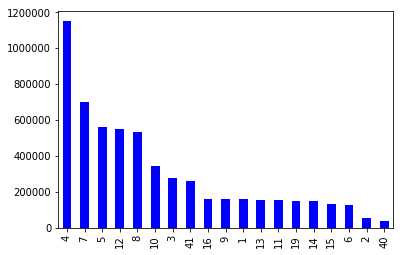

In [69]:
df_final.AwayTeamID.value_counts().plot(kind='bar',color='b')

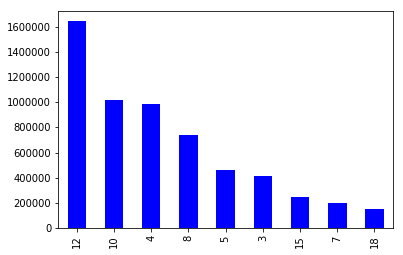

In [70]:
df_final.HomeTeamID.value_counts().plot(kind='bar',color='b')

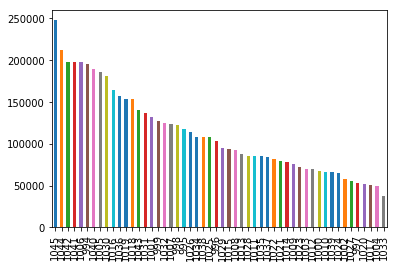

In [71]:
df_final.ATTENDANCEID.value_counts().plot(kind='bar')

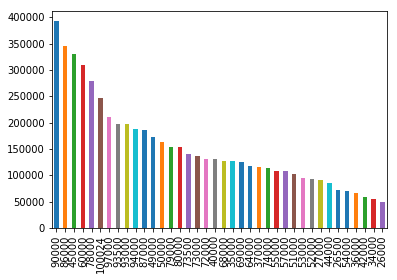

In [72]:
df_final.FINBUDGATT.value_counts().plot(kind='bar')

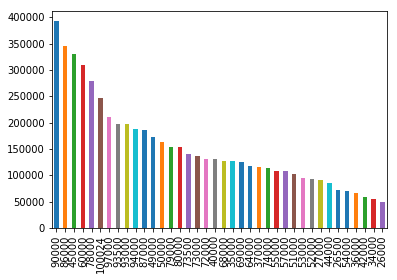

In [73]:
df_final.EVENTSTATT.value_counts().plot(kind='bar')

In [74]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


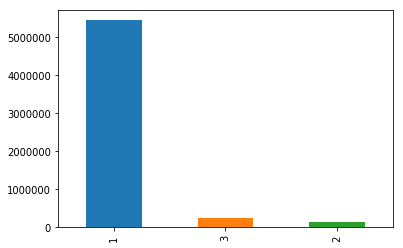

In [75]:
df_final.EVENTCATEGORYIDISEVENTACTIVE.value_counts().plot(kind='bar')


In [76]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


In [77]:
df_final.EVENTNAMEDATE.value_counts()

Richmond vs. Hawthorn                 320646
Melbourne vs. Geelong Cats            300208
Hawthorn vs. Melbourne                267915
West Coast Eagle vs. Collingwood      247265
Richmond vs. Collingwood              211640
Collingwood vs. Essendon              197335
Richmond vs. Carlton                  195583
Collingwood vs. GWS Giants            193729
Melbourne vs. Richmond                185629
Richmond vs. Collingwood              181356
Essendon vs. Richmond                 163562
Richmond vs. Essendon                 156952
Melbourne vs. Collingwood             153933
NSW Blues vs. Queensland Maroons      152923
Richmond vs. Geelong Cats             136228
Carlton vs. Collingwood               127523
Hawthorn vs. Essendon                 124567
Collingwood vs. Richmond              123067
Geelong Cats vs. Hawthorn             121988
Hawthorn vs. Collingwood              117162
Essendon vs. Collingwood              113739
Hawthorn vs. Geelong Cats             108011
Richmond v

### Reading Catering outlet map sheet

In [78]:
cot=pd.read_excel("CateringOutletMappingSheet.xlsx")

In [79]:
cot.head()

,profit_center_id,Outlet,Bay,Section,Seclevel
0,1,Vending 1 B1 B33 Ponsford,M34,Ponsford,Level 1
1,2,Snack 2 B1 B33 Ponsford,M34,Ponsford,Level 1
2,3,Snack 3 B1 B44 Piazza Coffee,M44,MCC,Level 1
3,4,Snack 4 B1 B45 Red Rooster,M44,MCC,Level 1
4,5,Snack 5 B1 B50 Northern,M50,Olympic,Level 1


In [80]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


In [81]:
df_final['profit_center_id'].unique()

array([145, 148, 169, 11, 4, 173, 172, 86, 93, 8, 13, 174, 61, 85, 26, 15,
       171, 103, 9, 14, 56, 144, 143, 154, 159, 104, 140, 147, 22, 150,
       87, 54, 23, 120, 21, 105, 126, 95, 83, 108, 124, 63, 90, 128, 31,
       58, 122, 16, 66, 133, 106, 19, 164, 132, 60, 160, 107, 17, 130, 81,
       3, 52, 2, 5, 67, 55, 92, 102, 7, 89, 91, 59, 69, 80, 24, 57, 10,
       138, 82, 101, 100, 113, 20, 51, 94, 18, 109, 165, 68, 96, 64, 168,
       157, 146, 155, 153, 185, 183, 181, 84, 25, 35, 71, 36, 112, 186, 6,
       53, 129, 162, 176, 142, '17', '103', '105', '16', '112', '71',
       '25', '23', '172', '144', '109', '162', '19', '85', '104', '56',
       '80', '96', '108', '93', '64', '159', '81', '120', '148', '24',
       '2', '140', '87', '14', '4', '122', '100', '164', '107', '86',
       '147', '154', '82', '90', '106', '83', '57', '94', '171', '8',
       '67', '59', '13', '9', '58', '54', '22', '66', '7', '173', '92',
       '95', '169', '61', '174', '11', '89', '51', '60', '5

In [82]:
df_final['profit_center_id']=pd.to_numeric(df_final['profit_center_id'])


In [83]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


In [84]:
#df_final.to_csv("df_final", sep='\t')


In [85]:
# df_final=pd.read_csv("df_final.csv",names=['check_number', 'profit_center_id', 'profit_center_name',
#        'tendered_date_time', 'DATE', 'menu_item_id', 'menu_item_name',
#        'menu_item_quantity', 'tender_name', 'EVENTID', 'EVENTNAME', 'DESCR',
#        'EVENTDATE', 'EVENTTIME', 'DAYID', 'YEARID', 'WEATHERTEMP',
#        'WEATHERRAIN', 'WEATHERWIND', 'VENUEID', 'ATTENDANCEID', 'DAYNIGHTID',
#        'MatchTimeName', 'HomeTeamID', 'AwayTeamID', 'TOTALATT',
#        'EVENTCATEGORYIDISEVENTACTIVE', 'EVENTTYPECLASSID', 'PARENTEVENTID',
#        'EVENTSTATT', 'FINBUDGATT', 'EVENTNAMEDATE', 'EVENTMONTH', 'EVENTDAY',
# #        'EVENTYEARNAME', 'FINANCIALYEAR', 'SEVENTAFINAL'], sep='\t',encoding = "ISO-8859-1")

In [86]:
df_final.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTTYPECLASSID,PARENTEVENTID,EVENTSTATT,FINBUDGATT,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Y,1,90000,90000,Richmond vs. Carlton,March,22,2018,2018,0


In [87]:
df_finalSet=pd.merge(df_final, cot, on='profit_center_id', how='inner')


In [88]:
df_finalSet.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1


### Create a model that showcases trends in food and beverage purchases made at different sections of the MCG, dependent upon internal factors (quality of game, game margin) and external factors (weather, time of day)

In [89]:
df_finalSet.columns

Index(['check_number', 'profit_center_id', 'profit_center_name',
       'tendered_date_time', 'DATE', 'menu_item_id', 'menu_item_name',
       'menu_item_quantity', 'tender_name', 'EVENTID', 'EVENTNAME', 'DESCR',
       'EVENTDATE', 'EVENTTIME', 'DAYID', 'YEARID', 'WEATHERTEMP',
       'WEATHERRAIN', 'WEATHERWIND', 'VENUEID', 'ATTENDANCEID', 'DAYNIGHTID',
       'MatchTimeName', 'HomeTeamID', 'AwayTeamID', 'TOTALATT',
       'EVENTCATEGORYIDISEVENTACTIVE', 'EVENTTYPECLASSID', 'PARENTEVENTID',
       'EVENTSTATT', 'FINBUDGATT', 'EVENTNAMEDATE', 'EVENTMONTH', 'EVENTDAY',
       'EVENTYEARNAME', 'FINANCIALYEAR', 'SEVENTAFINAL', 'Outlet', 'Bay',
       'Section', 'Seclevel'],
      dtype='object')

In [90]:
df_finalSet['Section'].unique()

array(['MCC', 'Olympic', 'Ponsford', 'Southern', 'AFL'], dtype=object)

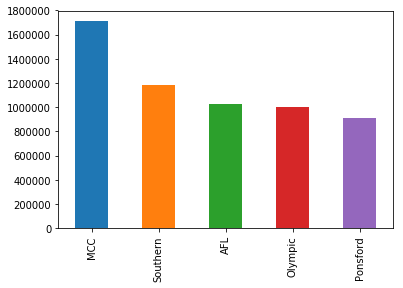

In [91]:
df_finalSet['Section'].value_counts().plot(kind ='bar')

In [92]:
df_finalSet.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1


In [93]:
howthron=df_finalSet[df_finalSet['HomeTeamID']==12]

In [94]:
howandrich=howthron[howthron['AwayTeamID']==8]

In [95]:
howandrich.menu_item_id.value_counts().head(10)

22812    38434
30004    36697
9252     21443
15813    15929
60590    15460
22820    15347
22824    10942
30005     7915
60618     7245
22809     7218
Name: menu_item_id, dtype: int64

In [96]:
#df_finalSet[df_finalSet['menu_item_id']==22809]

In [97]:
a=df_finalSet[df_finalSet['Seclevel']=='Level 1']

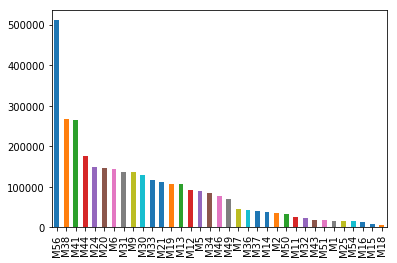

In [98]:
a['Bay'].value_counts().plot(kind='bar')

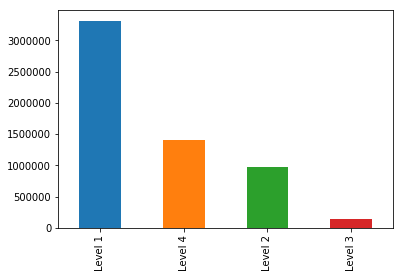

In [99]:
df_finalSet['Seclevel'].value_counts().plot(kind='bar')

In [100]:
#a.value_count().plot(kind = 'bar')

# top 10 items in store 169

In [111]:
df_finalSet[df_finalSet['menu_item_id'] == 30074]

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
81916,9804569,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:32:08.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81931,8750497,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:35:02.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81936,9804587,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:48:41.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,2,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81941,8750506,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:41:03.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,Cash,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81974,8750495,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:33:38.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,Cash,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81977,8705568,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:51:05.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81981,8711250,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:53:19.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,5,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81985,8699769,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:49:24.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
81998,8750498,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:36:30.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
82013,8705567,169,FD 645 L3 B43 Frank Grey Smith,2018-03-22 17:49:29.000,2018-03-22,30074,Beer Draught 285ml 1 Pot,2,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3


In [103]:
#z=df_finalSet[df_finalSet['profit_center_id'] == 169]

In [114]:
howandrich.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
6386,8097014,145,FD 525 L1 B37 Trumbles Dining,2018-04-08 12:01:12.000,2018-04-08,30235,Cafe Chicken Parmagiana,2,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
6387,8097014,145,FD 525 L1 B37 Trumbles Dining,2018-04-08 12:01:12.000,2018-04-08,65740,Cafe Gnocchi,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
6388,8097015,145,FD 525 L1 B37 Trumbles Dining,2018-04-08 12:02:40.000,2018-04-08,30465,Trumbles Bruschetta,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
6389,8097015,145,FD 525 L1 B37 Trumbles Dining,2018-04-08 12:02:40.000,2018-04-08,65740,Cafe Gnocchi,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
6390,8097015,145,FD 525 L1 B37 Trumbles Dining,2018-04-08 12:02:40.000,2018-04-08,30235,Cafe Chicken Parmagiana,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1


In [117]:
z=howandrich[howandrich['profit_center_id']== 169]

In [125]:
#z.menu_item_id.value_counts().head(10)
z.menu_item_id.value_counts().head(10)

22812    1585
22809     605
30074     298
60273     239
65444     205
60297     200
28773     160
65440     157
60618      94
31356      88
Name: menu_item_id, dtype: int64

# Cup Draught 1 Cup 425ml (OS) --- 22812 ---       35916 qty
# Beer Carlton Draught 1Pint 560ml	--- 22809 --- 10110 qty
# Beer Draught 285ml 1 Pot ---  30074 ---               6883 qty

In [123]:
z.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
94845,8751827,169,FD 645 L3 B43 Frank Grey Smith,2018-04-08 12:02:40.000,2018-04-08,30074,Beer Draught 285ml 1 Pot,2,Cash,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
94846,8751821,169,FD 645 L3 B43 Frank Grey Smith,2018-04-08 11:42:54.000,2018-04-08,31355,Beer Goose Island Cup 425ml,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
94847,8751822,169,FD 645 L3 B43 Frank Grey Smith,2018-04-08 11:45:19.000,2018-04-08,65720,Gourmet Lamb Pie,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
94848,8712962,169,FD 645 L3 B43 Frank Grey Smith,2018-04-08 11:42:26.000,2018-04-08,30074,Beer Draught 285ml 1 Pot,4,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3
94849,8712963,169,FD 645 L3 B43 Frank Grey Smith,2018-04-08 11:43:15.000,2018-04-08,60912,White Morgans Bay Sav Blanc GLS,1,IntegratedEftpos,1485,...,Richmond vs. Hawthorn,April,8,2018,2019,0,FD 645 L3 B43 Frank Grey Smith,P42,MCC,Level 3


In [122]:
z.menu_item_name.value_counts().head(10)

Cup Draught 1 Cup 425ml (OS)        1585
Beer Carlton Draught 1Pint 560ml     605
Beer Draught 285ml 1 Pot             298
Fat Yak 425ml 1 Cup                  239
Gourmet Sausage Roll                 205
Fat Yak Pint 560ml                   200
Frank Grey Dim Sim                   160
Gourmet Beef Guinness Pie            157
Bulmers Cider Stubbie                 94
Beer Goose Island Pint 560ml          88
Name: menu_item_name, dtype: int64

In [ ]:
#groupbyDate
b=df_finalSet.groupby(['DATE']).max()

In [ ]:
b['menu_item_id'].value_counts().plot(kind='bar')

In [ ]:
b['menu_item_id'].value_counts()

In [ ]:
b

In [ ]:
b['profit_center_id'].value_counts().plot(kind='bar')

## Snack 9 L1 B30 Ponsford --- 185
## Vending 6 B1 B55 Northern --- 186
## Vending 6 B1 B55 Northern --- 183

In [ ]:
#df_final[df_final['menu_item_id']==66019]

In [ ]:
#df_final[df_final['menu_item_id']==66044]

In [ ]:
#df_final[df_final['menu_item_id']==66043]

In [ ]:
#df_final[df_final['menu_item_id']==66018]

In [ ]:
#df_final[df_final['menu_item_id']==66048]

In [ ]:
#df_final[df_final['menu_item_id']==66013]

In [ ]:
#df_final[df_final['menu_item_id']==66032]

In [ ]:
#df_final[df_final['menu_item_id']==66024]

In [ ]:
#df_final[df_final['menu_item_id']==66016]

In [ ]:
#df_final[df_final['menu_item_id']==66014]

In [ ]:
#df_final[df_final['menu_item_id']==66059]

In [ ]:
#df_final['menu_item_id'].value_counts()

In [126]:
df_finalSet.head()

,check_number,profit_center_id,profit_center_name,tendered_date_time,DATE,menu_item_id,menu_item_name,menu_item_quantity,tender_name,EVENTID,...,EVENTNAMEDATE,EVENTMONTH,EVENTDAY,EVENTYEARNAME,FINANCIALYEAR,SEVENTAFINAL,Outlet,Bay,Section,Seclevel
0,8116422,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:21:08.000,2018-03-22,60187,HTB Staff Toast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
1,8116424,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:22:12.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
2,8116435,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:34:15.000,2018-03-22,60286,Staff Vegetarian Breakfast,1,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
3,8116436,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 08:35:25.000,2018-03-22,60190,HTB Staff Eggs on Toast,1,Cash,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1
4,8116458,145,FD 525 L1 B37 Trumbles Dining,2018-03-22 09:07:31.000,2018-03-22,16607,Hot Drink Hot Coffee,0,IntegratedEftpos,1478,...,Richmond vs. Carlton,March,22,2018,2018,0,FD 525 L1 B37 Trumbles Dining,M37,MCC,Level 1


In [127]:
df_finalSet.columns

Index(['check_number', 'profit_center_id', 'profit_center_name',
       'tendered_date_time', 'DATE', 'menu_item_id', 'menu_item_name',
       'menu_item_quantity', 'tender_name', 'EVENTID', 'EVENTNAME', 'DESCR',
       'EVENTDATE', 'EVENTTIME', 'DAYID', 'YEARID', 'WEATHERTEMP',
       'WEATHERRAIN', 'WEATHERWIND', 'VENUEID', 'ATTENDANCEID', 'DAYNIGHTID',
       'MatchTimeName', 'HomeTeamID', 'AwayTeamID', 'TOTALATT',
       'EVENTCATEGORYIDISEVENTACTIVE', 'EVENTTYPECLASSID', 'PARENTEVENTID',
       'EVENTSTATT', 'FINBUDGATT', 'EVENTNAMEDATE', 'EVENTMONTH', 'EVENTDAY',
       'EVENTYEARNAME', 'FINANCIALYEAR', 'SEVENTAFINAL', 'Outlet', 'Bay',
       'Section', 'Seclevel'],
      dtype='object')

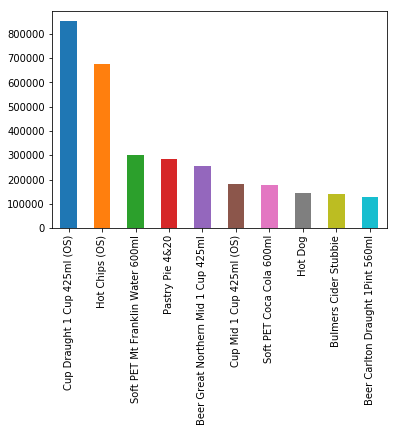

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [136]:
df_finalSet['menu_item_name'].value_counts().head(10).plot(kind='bar')
plt.show()
plt.figure(figsize=(30,30))

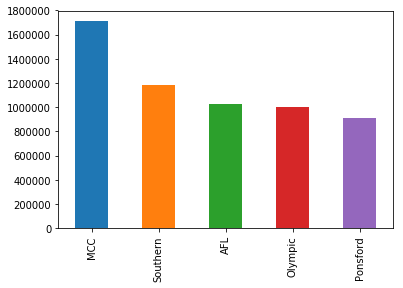

In [166]:
df_finalSet["Section"].value_counts().plot(kind = 'bar')

In [179]:
MCC=df_finalSet[df_finalSet['Section'] == 'AFL']

In [180]:
MCC['menu_item_name'].value_counts()

Cup Draught 1 Cup 425ml (OS)                 187767
Hot Chips (OS)                               150582
Beer Great Northern Mid 1 Cup 425ml           73712
Soft PET Mt Franklin Water 600ml              72211
Cup Mid 1 Cup 425ml (OS)                      70450
Pastry Pie 4&20                               70240
Soft PET Coca Cola 600ml                      45436
Bulmers Cider Stubbie                         37113
Hot Dog                                       31709
Jim Beam &Cola R2D                            30677
CC & Dry Mid Can                              27809
Smirnoff Red R2D                              21121
Lazy Yak 330ml Stubbie                        17052
Soft PET Coke No Sugar                        15973
Soft PET Sprite 600ml                         14890
RR Strips & Chips                             14076
Food Store Chicken Schnitzel Burger           12345
RR Chicken Sub (Roll)                         12189
White Wine by the Glass                       11903
RR Original 

2     36
1     33
3     15
14    15
5     13
13     9
7      8
17     8
4      7
6      7
Name: menu_item_name, dtype: int64

## Creating model for predicting attendance

In [139]:
data = pd.DataFrame(data=df_finalSet,columns=['WEATHERTEMP','WEATHERRAIN','WEATHERWIND','HomeTeamID','AwayTeamID','TOTALATT'])


In [140]:
data.dtypes

WEATHERTEMP    float64
WEATHERRAIN      int64
WEATHERWIND      int64
HomeTeamID       int64
AwayTeamID       int64
TOTALATT         int64
dtype: object

In [142]:
data.shape

(5829316, 6)

In [141]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['TOTALATT'],axis=1)

# Putting response variable to y
y = data['TOTALATT']

y.head()

0    90151
1    90151
2    90151
3    90151
4    90151
Name: TOTALATT, dtype: int64

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)


In [144]:
X_train.head()

,WEATHERTEMP,WEATHERRAIN,WEATHERWIND,HomeTeamID,AwayTeamID
3034608,12.7,0,20,12,5
2123526,6.5,2,13,4,41
5043027,12.2,0,11,18,19
3654550,12.4,0,11,15,4
2423867,16.0,0,15,10,4


In [162]:
y_train.head()

3034608     76424
2123526     72504
5043027     87122
3654550    100022
2423867     83518
Name: TOTALATT, dtype: int64

In [164]:
y_train.value_counts()

100022    196621
94959     168295
90152     157515
91767     157465
91440     157249
90151     155700
91446     150046
77071     147966
88180     144553
81046     130483
76424     125075
83518     122625
87122     121540
72504     112143
67054     108853
70701     105247
68548     101782
68857      99303
72157      98148
73189      97212
58051      93575
69868      90985
59529      86094
56998      86007
54934      85863
54112      81884
50393      76265
48850      74403
53018      73937
50228      69843
44669      68189
51424      68056
53439      67975
46286      67191
53706      65606
46423      63262
44122      62181
43240      60227
26562      57747
41973      56156
44602      55461
35518      53810
32784      53192
37285      52361
38910      51746
32870      46365
31053      43966
30941      42282
26693      40958
34542      40794
27900      39174
23072      30076
Name: TOTALATT, dtype: int64

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [147]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [153]:
rf_random = RandomForestClassifier(n_estimators= 10)
# Fit the random search model
rf_random.fit(X_train, y_train);

In [154]:
best_random = rf_random
best_random.score(X_test , y_test)

1.0

In [155]:
y_pred=rf_random.predict(X_test)

In [160]:
y_test.tail()

2585393    77071
920881     68548
2062182    44122
4361458    51424
502874     58051
Name: TOTALATT, dtype: int64

In [158]:
y_pred

array([26693, 70701, 32784, ..., 44122, 51424, 58051], dtype=int64)

In [1]:
#rf_random.score(y_pred,y_test.values)